In [1]:
import pandas as pd

file = 'data/battledeath.xlsx'

xls = pd.ExcelFile(file)

print(xls.sheet_names)

['2002', '2004']


In [2]:
df1 = xls.parse('2004')

print(df1.head())

df2 = xls.parse(0)

print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [4]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[1], names=['Country' , 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())


               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


In [10]:
from sas7bdat import SAS7BDAT

In [11]:
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


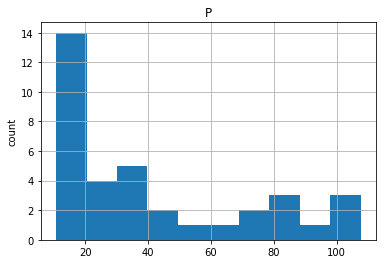

In [14]:
import matplotlib.pyplot as plt
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()
    
print(df_sas.head())

pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

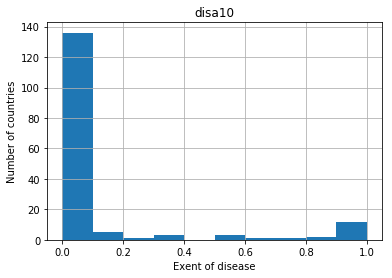

In [16]:
df = pd.read_stata('data/disarea.dta')

print(df.head())

pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Exent of disease')
plt.ylabel('Number of countries')
plt.show()

In [19]:
'''Consensus is rapidly converging in that Hierarchical
data format version 5 or HDF5 is the standard mechanism
for storing large quantities of numerical data '''

import h5py 

filename = 'data/L-L1_LOSC_4_V1-1126259446-32.hdf5'

file = h5py.File(filename, 'r')

print(type(file))

<class 'h5py._hl.files.File'>


In [20]:
for key in file.keys():
    print(key)

meta
quality
strain


In [22]:
print(type(file['meta']))

<class 'h5py._hl.group.Group'>


In [23]:
for key in file['meta'].keys():
    print(key)

Description
DescriptionURL
Detector
Duration
GPSstart
Observatory
Type
UTCstart


In [25]:
print(file['meta']['Description'].value, 
      file['meta']['Detector'].value)

b'Strain data time series from LIGO' b'L1'


/home/apolanco/anaconda3/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [26]:
import numpy as np
filename = 'data/LIGO_data.hdf5'
data = h5py.File(filename, 'r')

print(type(data))

for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


/home/apolanco/anaconda3/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


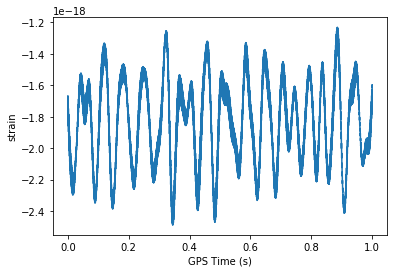

In [28]:
group = data['strain']

for key in group.keys():
    print(key)
    
strain = data['strain']['Strain'].value

num_samples = 10000

time = np.arange(0, 1, 1/num_samples)

plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

In [29]:
import scipy.io

filename = 'data/ja_data2.mat'


mat = scipy.io.loadmat(filename)

print(type(mat))

<class 'dict'>


In [30]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [32]:
print(type(mat['CYratioCyt']))

<class 'numpy.ndarray'>


In [31]:
print(mat['CYratioCyt'])

[[0.         1.53071547 1.54297013 ... 1.34990123 1.35329984 1.34922173]
 [0.         1.28605578 1.29385656 ... 1.31307311 1.30039694 1.30563938]
 [0.         1.32731222 1.32884617 ... 1.24887565 1.24506205 1.25825831]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.44552606 1.42862357 ... 0.         0.         0.        ]
 [0.         1.45794466 0.         ... 1.1229479  1.12224652 1.1486481 ]]


In [33]:
print(mat['CYratioCyt'].shape)

(200, 137)


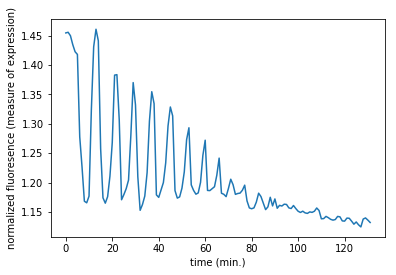

In [36]:
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluoresence (measure of expression)')
plt.show()